In [93]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score

In [94]:
# calling the dataset
creditcard_data = pd.read_csv("creditcard.csv")
creditcard_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [95]:
# dimensions of the dataset
creditcard_data.shape

(196172, 31)

In [96]:
# datatypes
creditcard_data.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class     float64
dtype: object

In [97]:
creditcard_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196172 entries, 0 to 196171
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    196172 non-null  float64
 1   V1      196172 non-null  float64
 2   V2      196172 non-null  float64
 3   V3      196172 non-null  float64
 4   V4      196172 non-null  float64
 5   V5      196172 non-null  float64
 6   V6      196172 non-null  float64
 7   V7      196172 non-null  float64
 8   V8      196172 non-null  float64
 9   V9      196172 non-null  float64
 10  V10     196172 non-null  float64
 11  V11     196172 non-null  float64
 12  V12     196172 non-null  float64
 13  V13     196172 non-null  float64
 14  V14     196172 non-null  float64
 15  V15     196172 non-null  float64
 16  V16     196172 non-null  float64
 17  V17     196172 non-null  float64
 18  V18     196172 non-null  float64
 19  V19     196172 non-null  float64
 20  V20     196171 non-null  float64
 21  V21     19

In [98]:
creditcard_data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [99]:
creditcard_data = creditcard_data.dropna()


In [100]:
columns_to_check = ['V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']
creditcard_data = creditcard_data.dropna(subset=columns_to_check)


In [101]:
duplicates = creditcard_data.drop_duplicates(inplace=True)

In [102]:
creditcard_data.shape

(195462, 31)

In [103]:
creditcard_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,195462.000000,195462.000000,195462.000000,195462.000000,195462.000000,195462.000000,195462.000000,195462.000000,195462.000000,195462.000000,...,195462.000000,195462.000000,195462.000000,195462.000000,195462.000000,195462.000000,195462.000000,195462.000000,195462.000000,195462.000000
mean,69453.091829,-0.105518,0.001248,0.339938,0.078789,-0.116240,0.046656,-0.052162,0.018416,0.007637,...,-0.016309,-0.051444,-0.016185,0.004922,0.063810,0.007117,0.003380,0.002653,89.736734,0.001862
std,33868.220469,1.878224,1.618587,1.431982,1.396269,1.356072,1.309438,1.203041,1.192344,1.133485,...,0.724278,0.687678,0.609170,0.603145,0.488916,0.488772,0.386110,0.311793,249.081134,0.043114
min,0.000000,-56.407510,-72.715728,-33.680984,-5.683171,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,43904.250000,-0.960135,-0.580148,-0.306505,-0.788996,-0.786738,-0.708792,-0.576016,-0.179066,-0.664918,...,-0.227309,-0.539540,-0.168598,-0.340865,-0.236373,-0.330985,-0.066985,-0.040429,5.990000,0.000000
50%,66520.500000,-0.094601,0.081780,0.505657,0.080307,-0.174831,-0.217902,-0.012067,0.043993,-0.075790,...,-0.043966,-0.038000,-0.029556,0.053284,0.106681,-0.060715,0.006319,0.018748,22.990000,0.000000
75%,88195.250000,1.211578,0.780230,1.231016,0.890967,0.456407,0.443094,0.496608,0.338261,0.626466,...,0.148788,0.417419,0.113533,0.421096,0.386076,0.262367,0.089226,0.078232,79.430000,0.000000
max,131388.000000,2.454930,22.057729,9.382558,16.875344,34.801666,22.529298,36.677268,20.007208,15.594995,...,27.202839,10.503090,19.002942,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000,1.000000


In [104]:
creditcard_data.Class.value_counts()                 #Valid = 0, Fraud = 1

0.0    195098
1.0       364
Name: Class, dtype: int64

<Axes: xlabel='Class', ylabel='Count'>

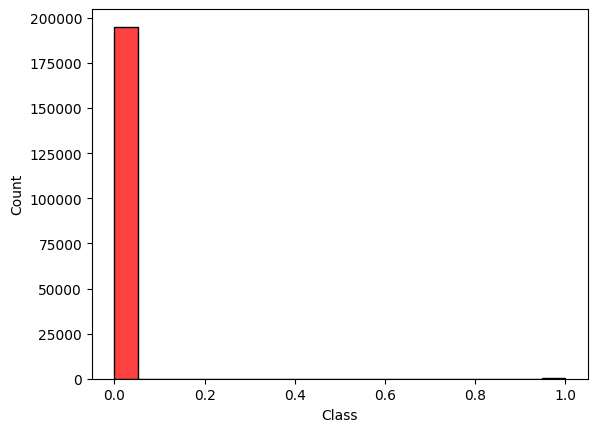

In [105]:
sns.histplot(creditcard_data['Class'], color='red')

In [106]:
X = creditcard_data.drop('Class', axis = 1)
y = creditcard_data['Class']

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [108]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [109]:
model = LogisticRegression(random_state = 42)

In [110]:
# Handling class imbalance using RandomOverSampler
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_train, y_train = oversampler.fit_resample(X_train, y_train)

In [111]:
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [112]:
y_pred = model.predict(X_test)

In [113]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("precision:", precision_score(y_test, y_pred))
print("recall:", recall_score(y_test, y_pred))
print("f1_score:", f1_score(y_test, y_pred))

Confusion Matrix:
 [[38164   845]
 [   11    73]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     39009
         1.0       0.08      0.87      0.15        84

    accuracy                           0.98     39093
   macro avg       0.54      0.92      0.57     39093
weighted avg       1.00      0.98      0.99     39093

precision: 0.07952069716775599
recall: 0.8690476190476191
f1_score: 0.14570858283433133


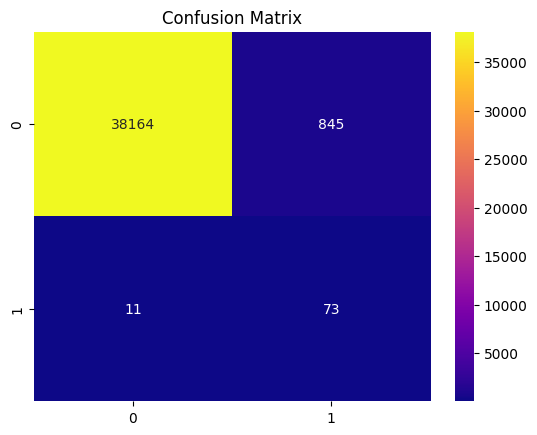

In [114]:
sns.heatmap(cm, annot=True, cmap='plasma', fmt='g')
plt.title('Confusion Matrix')
plt.show()